# Testing Jupyter Lab/Notebooks

Follow along with [this project](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb)

## Using [Pandas](https://pandas.pydata.org/) to read and manipulate data

In [1]:
import pandas as pd

iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can see that rows `[8, 12]` do not have values for the `petal_width_cm` property. With **Pandas** we can we can specify these values:

In [37]:
iris_data = pd.read_csv('data/iris-data.csv', na_values=['NA'])

Let's start by printing out some summary statistics about the data set.

In [38]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plotting with [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/)

In [42]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Creating a **scatterplot matrix**

**Note:** we need to drop rows with 'NA' values because seaborn does not know what to do with them

/home/marantesss/Documents/feup-iart/TP08/env/lib64/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/marantesss/Documents/feup-iart/TP08/env/lib64/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/marantesss/Documents/feup-iart/TP08/env/lib64/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/marantesss/Documents/feup-iart/TP08/env/lib64/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


'# this line removes object print'

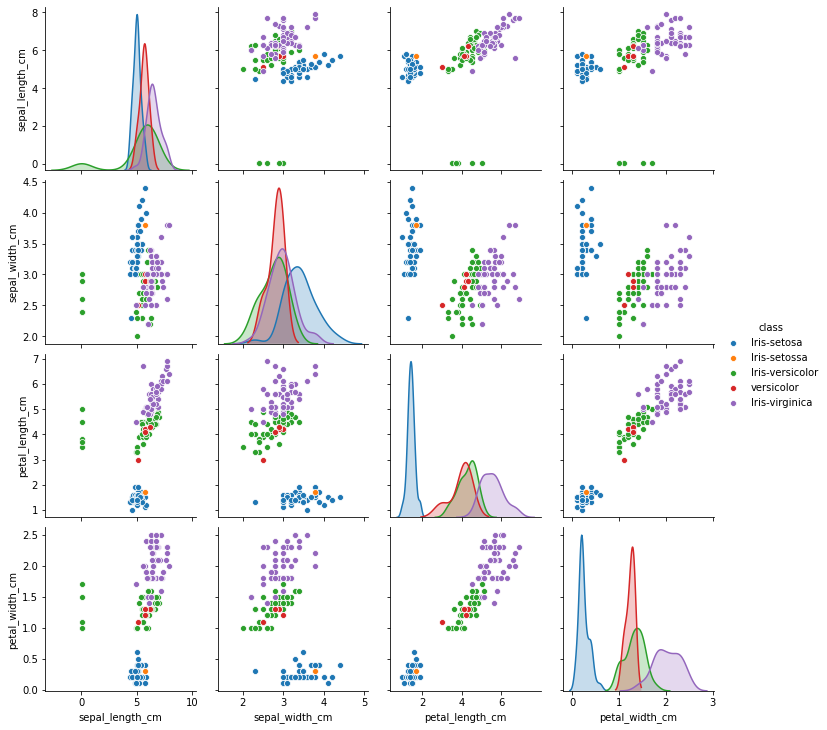

In [50]:
sb.pairplot(iris_data.dropna(), hue='class')
; # this line removes object print

### Problem with the data

1. There are 5 classes when in fact there are only 3 (*iris-setosa*, *iris-versicolor*, *iris-virginica*)
2. There are some **outliers** in the measurements they may be erroneus.
3. We dropped rows `[8, 12]` due to missing values

## Tidying the data

> 1.There are 5 classes when in fact there are only 3 (*iris-setosa*, *iris-versicolor*, *iris-virginica*)

### Problems:
 - **Row 19:** misspeled *Iris-setossa*


In [55]:
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

 - **Rows 96 to 100:** missing *iris-* before *versicolor* 

In [57]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'

Confirm everything is ok with class names:

In [60]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

> 2. There are some **outliers** in the measurements they may be erroneus.

### *Iris-setosa* anomalous entry

In the case of the one anomalous entry for *Iris-setosa*, let's say our field researchers know that **it's impossible for *Iris-setosa* to have a sepal width below 2.5 cm.** Clearly this entry was made in error, and **we're better off just scrapping the entry than spending hours finding out what happened**.

In [64]:
# we want entries that are not Iris-setosa OR have a sepal width greater than 2.5cm
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]

Checking the existense of outliers with a **histogram**.

''

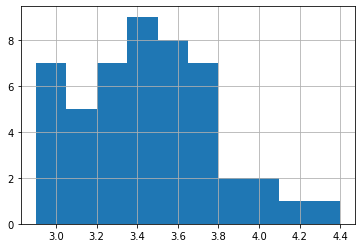

In [65]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()
;

### *Iris-versicolor* near-zero sepal lenghts rows

Let's take a look at those rows

In [67]:
# locate Iris-versicolor with sepal length lesser than 1.0 cm
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


These measurements have been **recorded in meters** instead of centimeters.

Let's fix this issue

''

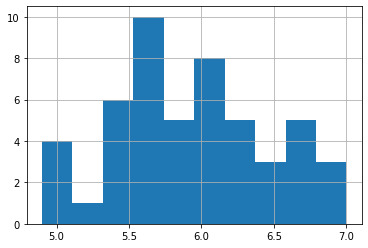

In [68]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
;

> 3. We dropped rows `[8, 12]` due to missing values

Let us first take a look at these null values:

In [69]:
# locate any attribute value with null values
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


It's not ideal that we had to drop those rows, especially considering they're all *Iris-setosa* entries. Since it seems like the missing data is systematic — all of the missing values are in the same column for the same Iris type — this error could potentially bias our analysis.

One way to deal with missing data is **mean imputation:** If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

Let's see if we can do that here.

''

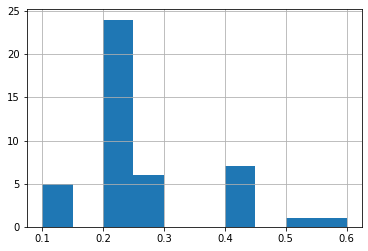

In [70]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()
;

Most of the petal widths for *Iris-setosa* **fall within the 0.2-0.3 range**, so let's fill in these entries with the average measured petal width.

In [71]:
# calculate mean/avg
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
# replace null values with mean
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width
# print newly updated entries
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [73]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
